<a href="https://colab.research.google.com/github/JontyDutta/Netflix-movies-and-tv-shows-clustering/blob/main/Netflix_Movies_Ans_Tv_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING



#### **Project Type**    - Unsupervised Machine Learning- Clustering
#### **Contribution**    - Individual

#### **Team Member** - Jonty Dutta


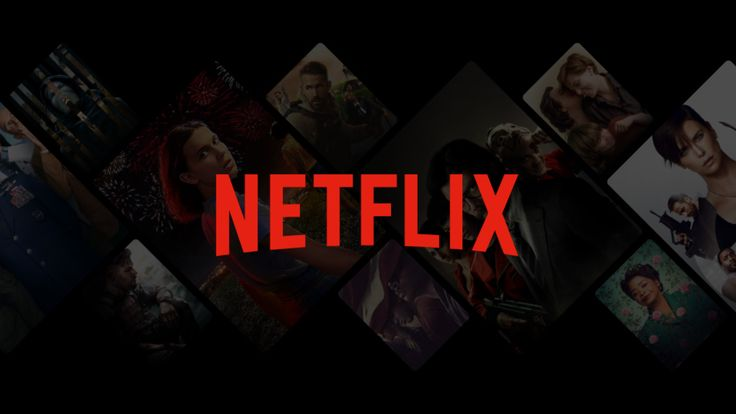

# **Project Summary -**


This is an Unsupervised Machine learning project in this project I will build a model that can be capable of clustering different different types of data. The dataset is about netflix shows which has 7787 rows and 12 columns like show_id which represents ID of the show, type represents type of the show, title represents show title, cast represents name of the casting stars, country represents the country of the show, date added represents the date when the show is added to netflix, release_year represents the year the show was released,rating represents the rating of the show, duration represents the length of the show, listed_in tells what type and where the show belongs from, description gives short descriptions about the show. My task is to read and understand the data after that I will have to show some meaningfull charts and explain everything about the chart then according to the visualization chart I will have to make some hypothesis assumptions about the project then testing the assumptions. Then I will handle missing and null values and outliers after completing these all task I will look for imbalanced data if there is any imbalanced data then I will have to deal with that. Then I will select some important features further I will split the data for test and training purpose.

# **GitHub Link -**

GitHub Link: https://github.com/JontyDutta/Netflix-movies-and-tv-shows-clustering

# **Problem Statement**


**Write Problem Statement Here.**

This dataset consists of tv shows and movies available on Netflix as of 2019.The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

#### **Business Context**

#### **Feature Informations**

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genre

description: The Summary description

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np   #array operation
import pandas as pd  #data operation
from numpy import math #arithmetic operation
import seaborn as sns  #data visualization
import matplotlib.pyplot as plt #data visualization

from matplotlib.pyplot import figure  #data visualization

from datetime import datetime  #datetime operation

import nltk  #text processing
nltk.download('stopwords')   #stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize #tokenize
from nltk.stem.snowball import SnowballStemmer #stemming
nltk.download('punkt')

import string      #string operation
from sklearn.feature_extraction.text import TfidfVectorizer   #text into int or float

from sklearn.cluster import KMeans  #k-means clustering

import scipy.cluster.hierarchy as shc  #dendogram
from sklearn.cluster import AgglomerativeClustering  #AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')  #ignore warnings

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look

print('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv') # display the csv file of netflix
path.head()


In [ ]:
path.tail()

In [ ]:
path.shape

In [ ]:
path.size

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv Rows:', path.shape[0])
print('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv Columns:', path.shape[1])

### Dataset Information

In [ ]:
# Dataset Info

print(path.info())


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

duplicate_count = path.duplicated().sum()
print(f'the duplicate value count is:' , duplicate_count)


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

null_values = path.isnull().sum()
print(f'the null value count is:' , null_values)

In [ ]:
# total null vales count
path.isnull().sum().sum()

In [ ]:
# describe dataset
path.describe(include='all')

## **EDA(Exploratory Data Analysis**

In [ ]:
path['type'].value_counts()

In [ ]:
sns.countplot(path,x='type')


In Netflix total 5377 movies and 2410 TV shows

In [ ]:
path['rating']

In [ ]:
ratings = {
     'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

path['target_ages'] = path['rating'].replace(ratings)

In [ ]:
path.head()


In [ ]:
path['target_ages'].value_counts()

In [ ]:
path['target_ages'] = pd.Categorical(path['target_ages'],categories=['Kids','Older Kids','Teens','Adults'])

In [ ]:
tv_shows=path[path['type']=='TV Show']

In [ ]:
movies=path[path['type']=='Movie']

In [ ]:
tv_rating=pd.DataFrame(tv_shows['rating'].value_counts().reset_index(name='count'))

In [ ]:
tv_rating.columns=['rating','count']

In [ ]:
tv_rating

# **What all manipulations have you done and insights you found?**

###1) First of I assigned all movies' data to a variable and TV shows' data to another variable and made a class which is responsible of extracting data from string and also made 2 functions for getting duration values and units.

###2) Total numbers of columns is: 12

###3) Total numbers of Rows is :2287

###4) Lowest target audience is kids: 513

###5) Highest target audience is adults : 3620

###6) Rating for highest number of movie is TV-MA : 1018

###7) Director column has highest number of missing value.

In [ ]:
plt.figure(figsize=(14,7))
sns.pointplot(x='rating',y='count',data=tv_rating)
plt.show()

TV-MA has the highest number of ratings for tv shows i,e adult ratings

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(data=movies,x='rating',hue=movies.target_ages,order=movies['rating'].value_counts().index)
plt.show()

TV-MA has the highest number of ratings for tv shows i,e adult ratings in both the cases TV-MA has the highest number of ratings

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=path,order=movies['release_year'].value_counts().index[0:20])

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=path,order=tv_shows['release_year'].value_counts().index[0:20])

highest number of movies released in 2017 and 2018

highest number of movies released in 2020

The number of movies on Netflix is growing significantly

faster than the number of TV shows.

We saw a huge increase in the number of movies and television episodes after 2015.

there is a significant drop in the number of movies and television episodes produced after 2020.

It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows

In [ ]:
path['month'] = pd.DatetimeIndex(path['date_added']).month
path.head()

In [ ]:
plt.figure(figsize=(12,10))
ax=sns.countplot(x='month',data= path)

From October to January, maximum number of movies and TV shows were added.

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month', hue='type',lw=5, data=path, ax=ax)

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])


Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies


In [ ]:
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])
plt.show()

kids tv is the top most TV show genre in netflix


In [ ]:
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)


highest number of tv_shows consistig of single season

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(x=path['country'],order=path['country'].value_counts().index[0:15],hue=path['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

usa has the highest number of content on the netflix ,followed by india

In [ ]:
country=path['country'].value_counts().reset_index()
country

#  ****Feature Engineering****

In [ ]:
path['description'].astype(str)

In [ ]:
path['description'] = path['description'].apply(lambda x: x.split(' '))

In [ ]:
path['description']= path['description'].apply(lambda x: " ".join(x))

path['description']= path['description'].apply(lambda x: x.lower())

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string

    translator = str.maketrans('', '', string.punctuation)

    return text.translate(translator)

path['description']= path['description'].apply(remove_punctuation)

In [ ]:
path['description'][0:10]

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')

def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]

    return " ".join(text)

path['description']=path['description'].apply(stopwords)

path['description'][0]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(path['description'])
X_tfidf.shape

In [ ]:
X = X_tfidf.toarray()

# MODEL

# **K-MEANS**

In [ ]:
wcss_list= []

for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

In [ ]:
path["cluster"] = y_predict

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=path, ax=ax)

# ***DENDOGRAM***

In [ ]:
plt.figure(figsize =(9, 9))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

# **Conclusion**

from elbow and sillhoute score ,optimal of 26 clusters formed , K Means is best for identification than Hierarchical as the evaluation metrics also indicates the same.in kmean cluster 0 has the highest number of datapoints and evnly distributed for other cluster

Netflix has 5372 movies and 2398 TV shows, there are more number movies on Netflix than TV shows.

TV-MA has the highest number of ratings for tv shows i,e adult ratings

highest number of movies released in 2017 and 2018 highest number of movies released in 2020 The number of movies on Netflix is growing significantly faster than the number of TV shows. We saw a huge increase in the number of movies and television episodes after 2015. there is a significant drop in the number of movies and television episodes produced after 2020. It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows

the most content is added to Netflix from october to january

Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies

kids tv is the top most TV show genre in netflix

most of the movies have duration of between 50 to 150 highest number of tv_shows consistig of single season Those movies that have a rating of NC-17 have the longest average duration. When it comes to movies having a TV-Y rating, they have the shortest runtime on average

usa has the highest number of content on the netflix ,followed by india

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***

## Analysis By: JONTY DUTTA